In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
#loading dataset 
df=pd.read_csv("walmart.csv")

In [3]:
#checking size of dataset
df.shape
print("the number of rows is ",df.shape[0])
print("the number of columns is ",df.shape[1])

the number of rows is  550068
the number of columns is  10


In [4]:
#checking the first 5 records to understand the data
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [5]:
#checking the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
col=["Occupation","City_Category","Age","Product_Category"]

In [7]:
# changing the datatype to category wherever possible to make it memory efficient
for i in col:
    df[i]=df[i].astype("category")
    

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  object  
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  object  
 7   Marital_Status              550068 non-null  int64   
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(4), int64(3), object(3)
memory usage: 27.3+ MB


In [9]:
#checking the number of unique values in each column
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [10]:
#checking count of null values in each column
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [11]:
#statistical analysis
df.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.0,550068,550068,550068.000000,550068.0,550068.000000
unique,NaN,3631,2,7,21.0,3,5,NaN,20.0,NaN
top,NaN,P00265242,M,26-35,4.0,B,1,NaN,5.0,NaN
freq,NaN,1880,414259,219587,72308.0,231173,193821,NaN,150933.0,NaN
mean,1.003029e+06,NaN,NaN,NaN,NaN,NaN,NaN,0.409653,NaN,9263.968713
std,1.727592e+03,NaN,NaN,NaN,NaN,NaN,NaN,0.491770,NaN,5023.065394
min,1.000001e+06,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,12.000000
25%,1.001516e+06,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,12054.000000


<AxesSubplot:ylabel='Purchase'>

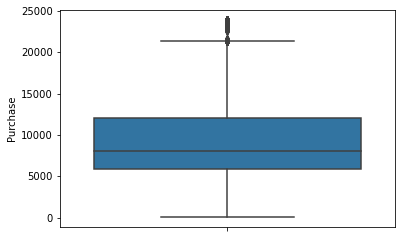

In [12]:
#there are outliers in the Purchase column
sns.boxplot(y=df.Purchase)

In [13]:
#calculating the IQR range-
IQRTable=df.describe().loc[['25%','75%']].T


In [14]:
IQRTable["IQR"]=IQRTable['75%']-IQRTable['25%']

In [15]:
IQRTable

,25%,75%,IQR
User_ID,1001516.0,1004478.0,2962.0
Marital_Status,0.0,1.0,1.0
Purchase,5823.0,12054.0,6231.0


In [16]:
IQRTable["lowerlimit"]=IQRTable["25%"]-1.5*IQRTable["IQR"]
IQRTable["upperlimit"]=IQRTable["75%"]+1.5*IQRTable["IQR"]


In [17]:
IQRTable

,25%,75%,IQR,lowerlimit,upperlimit
User_ID,1001516.0,1004478.0,2962.0,997073.0,1008921.0
Marital_Status,0.0,1.0,1.0,-1.5,2.5
Purchase,5823.0,12054.0,6231.0,-3523.5,21400.5


In [18]:
df1=df
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [94]:
#replacing the outlier values with upperlimitvalues also retaining the existing values in the dataset

df.loc[df["Purchase"]>IQRTable.loc["Purchase","upperlimit"],"NewPurchase"]=IQRTable.loc["Purchase","upperlimit"]
df["NewPurchase"].fillna(df["Purchase"],inplace=True)



In [95]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,NewPurchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,7969.0


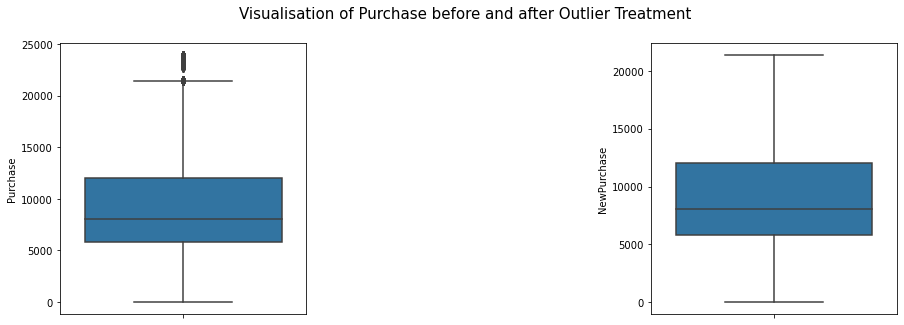

In [23]:
#After outlier treatment plotting a boxplot to see changes-
plt.figure(figsize=(15,5))
plt.suptitle("Visualisation of Purchase before and after Outlier Treatment",size=15)
plt.subplot(1,3,1)
sns.boxplot(y=df["Purchase"])
plt.subplot(1,3,3)
sns.boxplot(y=df["NewPurchase"])
plt.show()


In [98]:
#checking number transactions of female and male customers  
df["Gender"].value_counts(normalize=True)*100


M    75.310507
F    24.689493
Name: Gender, dtype: float64

In [102]:
df_gender= pd.DataFrame(df.groupby(by = ['Gender'])['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'unique_customers'})
df_gender['percent_share'] = np.round(df_gender['unique_customers'] / df_gender['unique_customers'].sum() * 100, 2)
df_gender

,Gender,unique_customers,percent_share
0,F,1666,28.28
1,M,4225,71.72


In [97]:
#checking number of transactions of female and male customers
df["Marital_Status"].value_counts(normalize=True)*100

0    59.034701
1    40.965299
Name: Marital_Status, dtype: float64

In [99]:
#checking the number of transactions of each occupation 
df["Occupation"].value_counts(normalize=True)*100

4     13.145284
0     12.659889
7     10.750125
1      8.621843
17     7.279645
20     6.101427
12     5.668208
14     4.964659
2      4.833584
16     4.612339
6      3.700452
3      3.208694
10     2.350618
5      2.213726
15     2.211545
11     2.106285
19     1.538173
13     1.404917
18     1.203851
9      1.143677
8      0.281056
Name: Occupation, dtype: float64

In [27]:
#City wise contribution to walmart's revenue on blackfriday sale
df["City_Category"].value_counts(normalize=True)*100

B    42.026259
C    31.118880
A    26.854862
Name: City_Category, dtype: float64

In [28]:
#productcategory counts
df["Product_Category"].value_counts(normalize=True)*100


5     27.438971
1     25.520118
8     20.711076
11     4.415272
2      4.338373
6      3.720631
3      3.674637
4      2.136645
16     1.786688
15     1.143495
13     1.008784
10     0.931703
12     0.717548
7      0.676462
18     0.568112
20     0.463579
19     0.291419
14     0.276875
17     0.105078
9      0.074536
Name: Product_Category, dtype: float64

##### How many transactions are made by each gender category ?

In [29]:
df.groupby(by = ['Gender'])['User_ID'].count()

Gender
F    135809
M    414259
Name: User_ID, dtype: int64

##### How many average transactions are made by each gender category ?

In [30]:
dfaverage=(df.groupby(by = ['Gender'])['User_ID'].count()/df.groupby(by = ['Gender'])['User_ID'].nunique()).reset_index()
dfaverage

,Gender,User_ID
0,F,81.518007
1,M,98.049467


In [31]:
print('Average number of transactions made by each Male on Black Friday is', round(dfaverage.loc[1,"User_ID"],1))
print('Average number of transactions made by each Female on Black Friday is',round(dfaverage.loc[0,"User_ID"],1))

Average number of transactions made by each Male on Black Friday is 98.0
Average number of transactions made by each Female on Black Friday is 81.5


##### What is the total Revenue generated by Walmart from each Gender ?

In [32]:
df.groupby(by=["Gender"])["NewPurchase"].sum().to_frame().sort_values(by="NewPurchase",ascending=False).reset_index()

,Gender,NewPurchase
0,M,3.905789e+09
1,F,1.185104e+09


##### What is the average total purchase made by each user  in each gender ?

In [33]:
df.groupby(by=["Gender"])["NewPurchase"].sum().to_frame().sort_values(by="NewPurchase",ascending=False).reset_index()

,Gender,NewPurchase
0,M,3.905789e+09
1,F,1.185104e+09


##### What is the Average Revenue generated by Walmart from each Gender? 

In [34]:
pd.DataFrame(df.groupby(by = 'Gender')['NewPurchase'].mean()).reset_index().rename(columns = {'NewPurchase' : 'Average_Purchase'})

,Gender,Average_Purchase
0,F,8726.256327
1,M,9428.373455


In [104]:
#total purchase by each marital status category
df.groupby(by = ['Marital_Status'])['User_ID'].count()

Marital_Status
0    324731
1    225337
Name: User_ID, dtype: int64

##### How many transactions are made by each Marital Status category ?

In [35]:
df.groupby(by = ['Marital_Status'])['User_ID'].count()/df.groupby(by = ['Marital_Status'])['User_ID'].nunique()

Marital_Status
0    95.033948
1    91.082053
Name: User_ID, dtype: float64

In [36]:
df_marital_status_revenue = df.groupby(by = ['Marital_Status'])['NewPurchase'].sum().to_frame().sort_values(by = 'NewPurchase', ascending = False).reset_index()
df_marital_status_revenue['percent_share'] = np.round((df_marital_status_revenue['NewPurchase'] / df_marital_status_revenue['NewPurchase'].sum()) * 100, 2)
df_marital_status_revenue["NewPurchase"]=df_marital_status_revenue["NewPurchase"].astype("float")

In [37]:
df_marital_status_revenue

,Marital_Status,NewPurchase,percent_share
0,0,3.006203e+09,59.05
1,1,2.084690e+09,40.95


In [105]:
#unique customers in each age bar


In [38]:
df_age = pd.DataFrame(df.groupby(by = ['Age'])['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'unique_customers'}).sort_values(by = 'unique_customers', ascending = False)

df_age

,Age,unique_customers
2,26-35,2053
3,36-45,1167
1,18-25,1069
4,46-50,531
5,51-55,481
6,55+,372
0,0-17,218


# What is the total purchase made by each age group?

In [39]:
df_age_revenue = pd.DataFrame(df.groupby(by = 'Age', as_index = False)['Purchase'].sum()).sort_values(by = 'Purchase', ascending = False)
df_age_revenue


,Age,Purchase
2,26-35,2031770578
3,36-45,1026569884
1,18-25,913848675
4,46-50,420843403
5,51-55,367099644
6,55+,200767375
0,0-17,134913183


[]

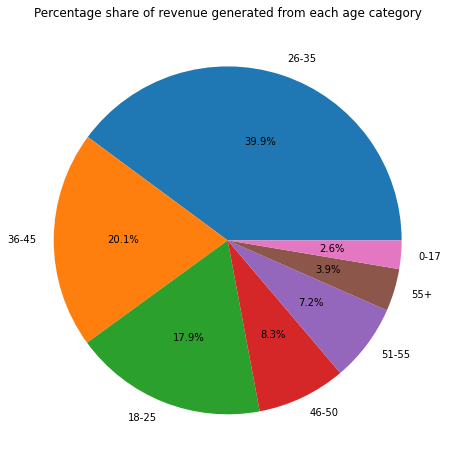

In [40]:
plt.figure(figsize = (8, 8))
plt.title('Percentage share of revenue generated from each age category')
plt.pie(x=df_age_revenue["Purchase"],autopct='%1.1f%%',labels = df_age_revenue['Age'])
plt.plot()

# UNIVARIATE ANALYSIS-

In [41]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,NewPurchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,7969.0


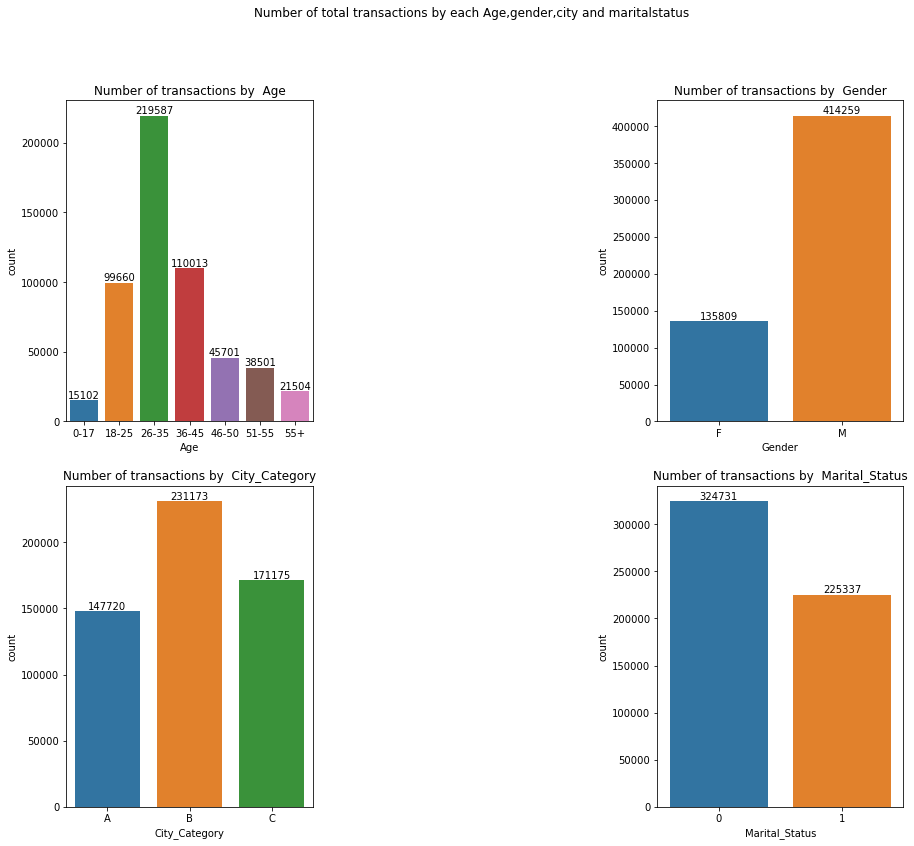

In [42]:
clmns=["Age","Gender","City_Category","Marital_Status"]
plt.figure(figsize=(15,13))
place=[1,3,4,6]
k=0
plt.suptitle("Number of total transactions by each Age,gender,city and maritalstatus")
for i in clmns:
    plt.subplot(2,3,place[k])
    a=sns.countplot(data=df,x=i)
    a.bar_label(a.containers[0])
    plt.title("Number of transactions by  "+i)
    k+=1

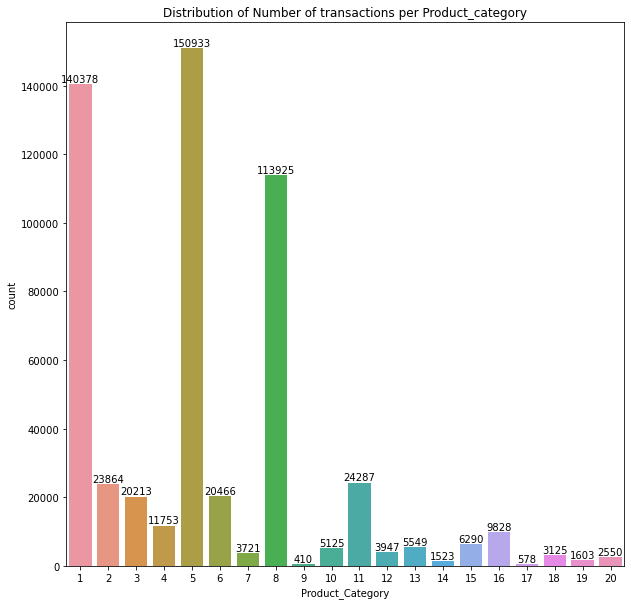

In [43]:
#plotting of product_category's count
plt.figure(figsize=(10,10))
plt.title("Distribution of Number of transactions per Product_category")
a=sns.countplot(x=df["Product_Category"])
a.bar_label(a.containers[0])
plt.show()

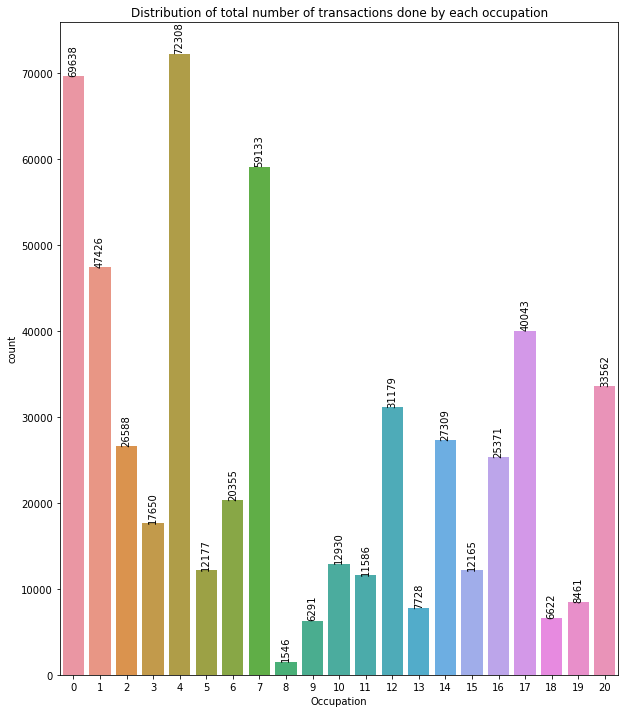

In [44]:
#check count for Occupation

plt.figure(figsize=(10,12))
a=sns.countplot(x=df["Occupation"])
plt.title("Distribution of total number of transactions done by each occupation")
a.bar_label(a.containers[0],rotation=90,label_type='edge')
plt.show()

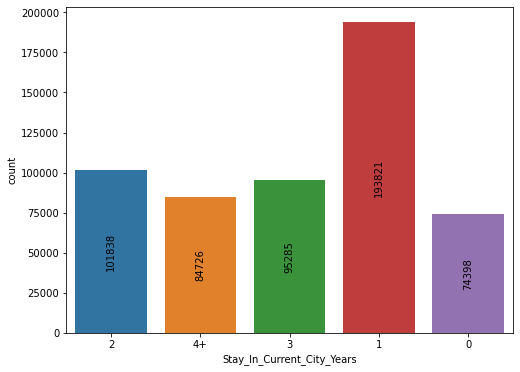

In [45]:
#Distribution of total number of transactions done by people according to their total stays
plt.figure(figsize=(8,6))
a=sns.countplot(x=df['Stay_In_Current_City_Years'])
a.bar_label(a.containers[0],rotation=90,label_type='center')
plt.show()

In [46]:

df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,NewPurchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,7969.0
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227,15227.0
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215,19215.0
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854,15854.0
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686,15686.0
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871,7871.0


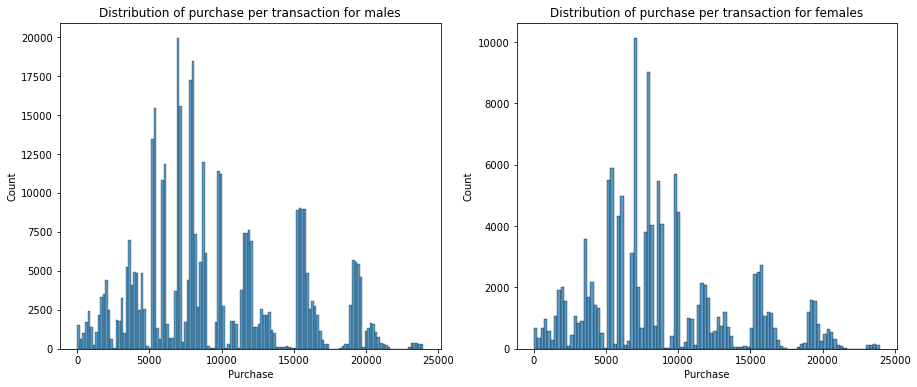

In [47]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.title('Distribution of purchase per transaction for males')
df_male = df[df['Gender'] == 'M']
sns.histplot(data = df_male, x = 'Purchase')

plt.subplot(1, 2 ,2)
plt.title('Distribution of purchase per transaction for females')
df_female = df[df['Gender'] == 'F']
sns.histplot(data = df_female, x = 'Purchase')

plt.show()

# Bi-Variate Analysis

[]

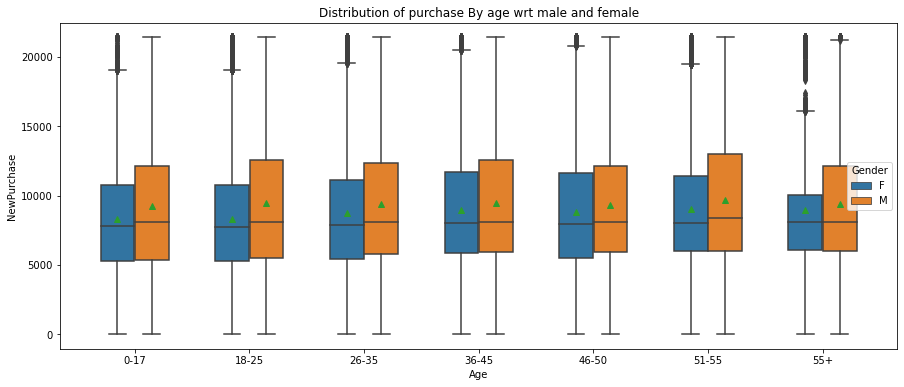

In [48]:
plt.figure(figsize = (15, 6))
sns.boxplot(data = df, x = 'Age', y = 'NewPurchase', hue = 'Gender', showmeans = True, width = 0.6)

plt.title('Distribution of purchase By age wrt male and female')
plt.plot()

[]

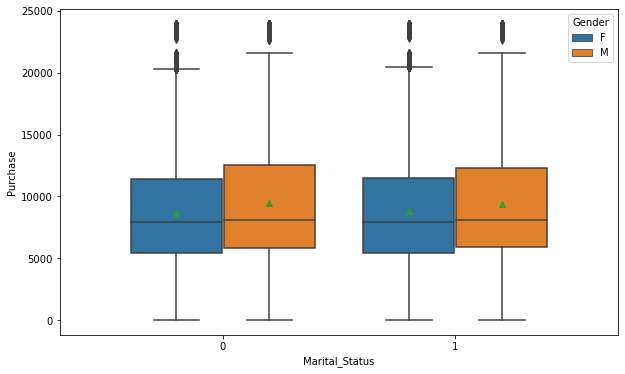

In [49]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = 'Marital_Status', y = 'Purchase', hue = 'Gender', showmeans = True, width  = 0.8)
plt.plot()

# What is the revenue generated from different cities ?

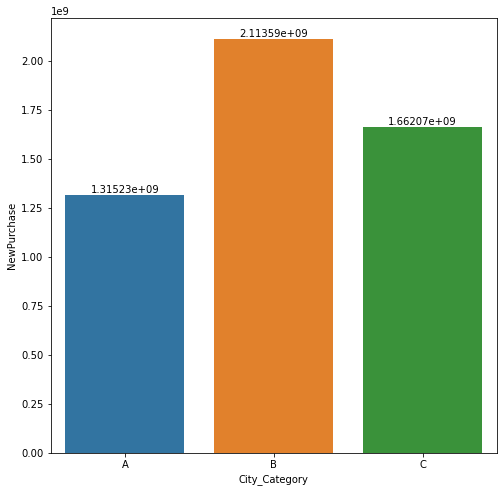

In [50]:
#Total purchases by each city
plt.figure(figsize=(8,8))
df1=df.groupby(["City_Category"])["NewPurchase"].sum().reset_index()
a=sns.barplot(y=df1["NewPurchase"],x=df1["City_Category"])
a.bar_label(a.containers[0])
plt.show()

# What is the revenue generated from different Categories of product?

In [51]:
df.groupby(["Product_Category"])["NewPurchase"].sum().to_frame().sort_values(by = 'NewPurchase', ascending = False).reset_index()

,Product_Category,NewPurchase
0,1,1.910014e+09
1,5,9.418352e+08
2,8,8.543188e+08
3,6,3.241503e+08
4,2,2.685162e+08
5,3,2.040847e+08
6,16,1.451206e+08
7,11,1.137911e+08
8,10,9.607134e+07
9,15,9.293973e+07


In [52]:
total=df["NewPurchase"].sum()

In [53]:
top10=df.groupby(["Product_Category"])["NewPurchase"].sum().to_frame().sort_values(by = 'NewPurchase', ascending = False).reset_index().head(10)

# Percent wise contribution of top 10 categories to total revenue


<AxesSubplot:xlabel='Product_Category', ylabel='NewPurchase'>

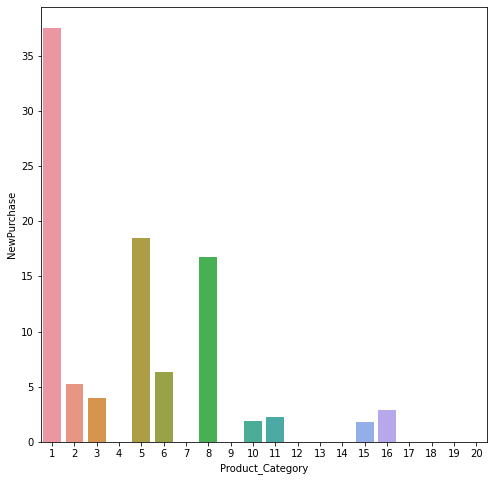

In [54]:
plt.figure(figsize=(8,8))
sns.barplot(x=top10["Product_Category"],y=(top10["NewPurchase"]/total)*100)


# What is the contribution of each occupation to revenue?


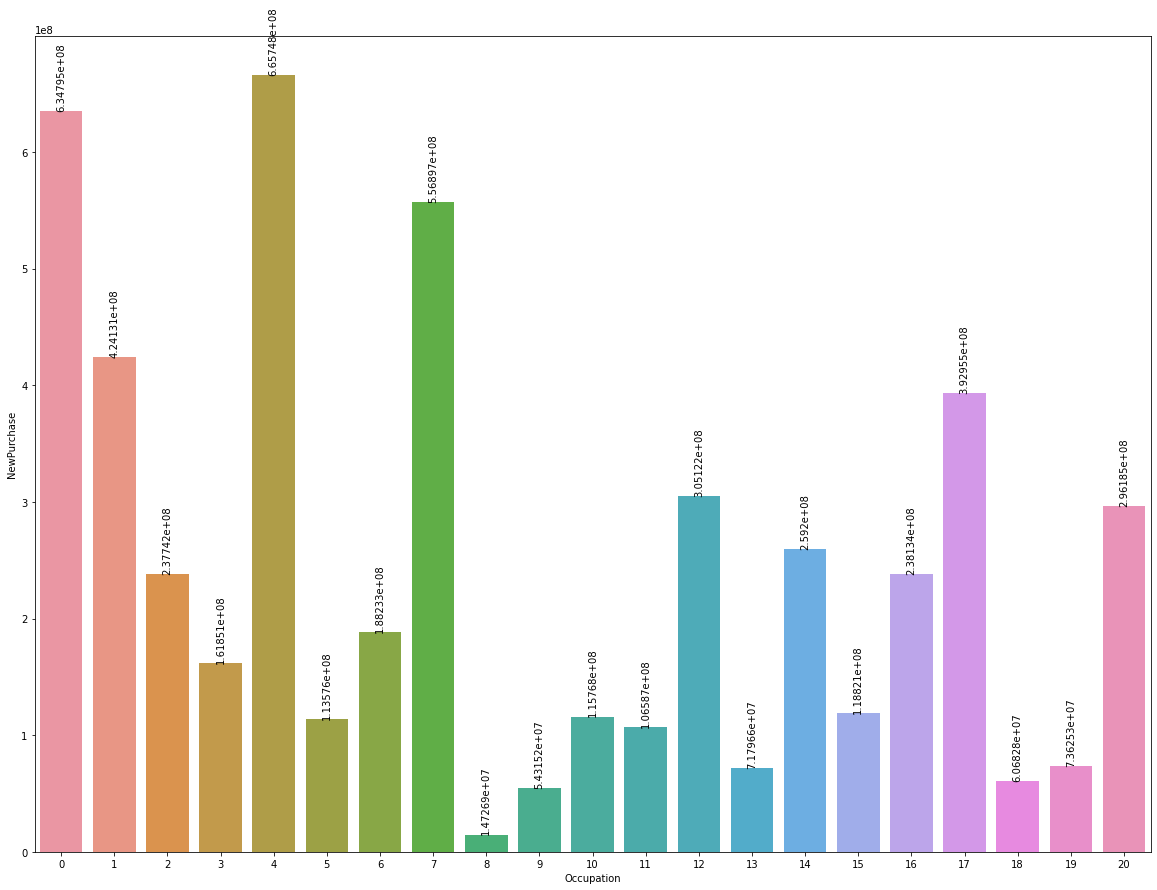

In [55]:
#total Purchases by Each occupation
plt.figure(figsize=(20,15))
df1=df.groupby(["Occupation"])["NewPurchase"].sum().reset_index()
a=sns.barplot(y=df1["NewPurchase"],x=df1["Occupation"])
a.bar_label(a.containers[0],rotation=90)
plt.show()

# # What is the contribution of each age group to revenue?


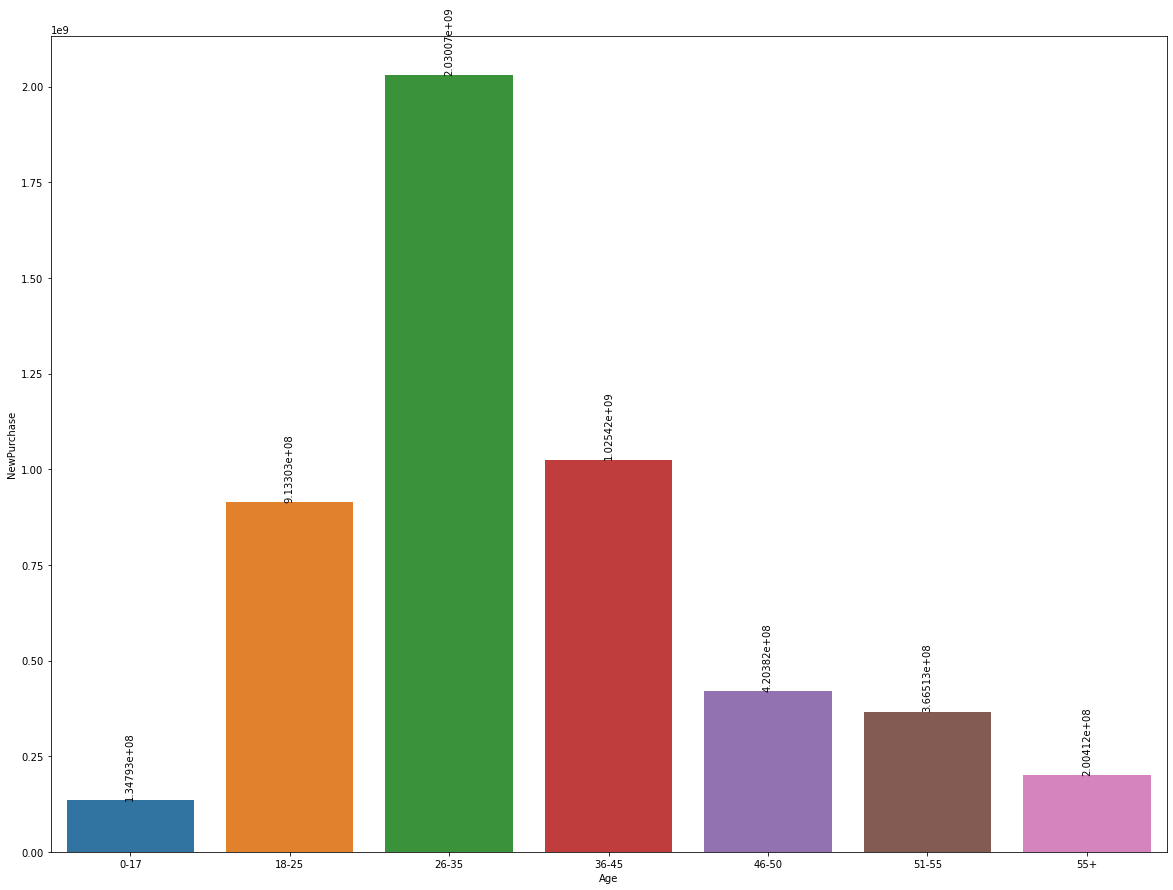

In [56]:
#total Purchases by Each Age group
plt.figure(figsize=(20,15))
df1=df.groupby(["Age"])["NewPurchase"].sum().reset_index()
a=sns.barplot(y=df1["NewPurchase"],x=df1["Age"])
a.bar_label(a.containers[0],rotation=90)
plt.show()

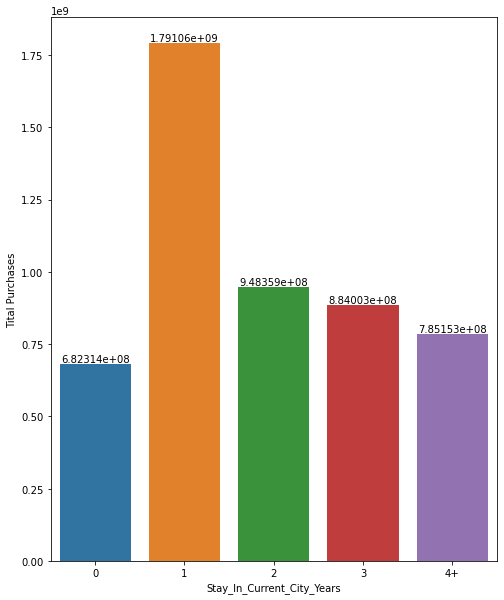

In [57]:
#Total purchases according to stay
plt.figure(figsize=(8,10))

df1=df.groupby(["Stay_In_Current_City_Years"])["NewPurchase"].sum().reset_index()
a=sns.barplot(y=df1["NewPurchase"],x=df1["Stay_In_Current_City_Years"])
plt.ylabel("Tital Purchases")
a.bar_label(a.containers[0])
plt.show()

In [58]:
pd.crosstab(df["Age"],df["Product_Category"])

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Age,,,,,,,,,,,,,,,,,,,,
0-17,3585,805,1200,758,4330,399,53,2258,16,111,740,125,112,39,160,229,6,27,59,90
18-25,26962,4428,4710,2463,28522,3749,481,17911,63,603,4597,439,756,230,1024,1598,41,339,275,469
26-35,58249,8928,7662,4192,61473,8485,1651,44256,154,1787,9874,1096,2096,564,2372,4118,127,1042,563,898
36-45,27648,4912,3854,2354,29377,3899,809,23296,107,1235,4953,994,1250,312,1395,1955,135,702,320,506
46-50,10474,2105,1376,990,11971,1622,327,10656,33,520,2104,520,551,149,602,879,95,351,149,227
51-55,9049,1781,924,678,9893,1450,266,9340,29,519,1458,433,483,154,508,672,107,423,134,200
55+,4411,905,487,318,5367,862,134,6208,8,350,561,340,301,75,229,377,67,241,103,160


# Multi-Variate Analysis-

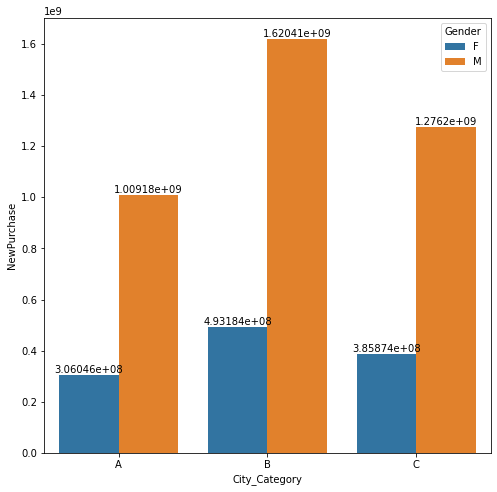

In [59]:

 #Total purchases by each city per gender
plt.figure(figsize=(8,8))
df1=df.groupby(["City_Category","Gender"])["NewPurchase"].sum().reset_index()
a=sns.barplot(y=df1["NewPurchase"],x=df1["City_Category"],hue=df1["Gender"])
a.bar_label(a.containers[0])
a.bar_label(a.containers[1])
plt.show()

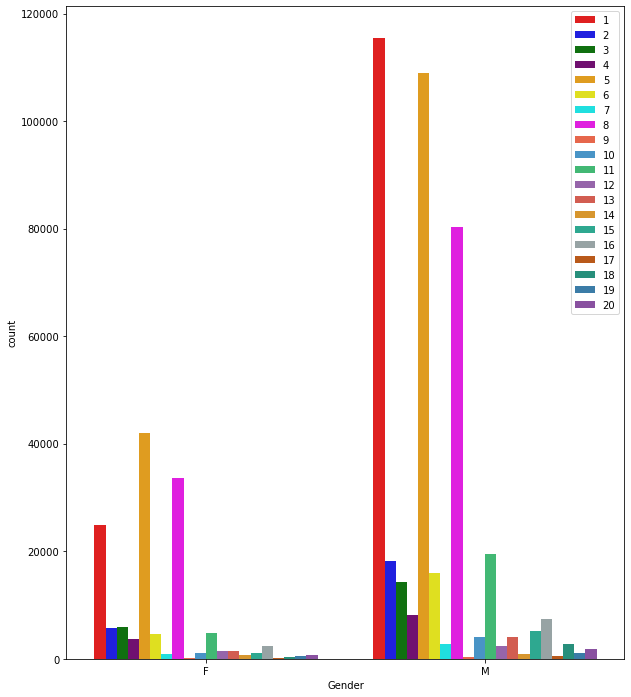

In [60]:
#Category preference by each gender
plt.figure(figsize=(10,12))

custom_palette = sns.color_palette([
    'red', 'blue', 'green', 'purple', 'orange', 'yellow', 'cyan', 'magenta',
    '#FF5733', '#3498db', '#2ecc71', '#9b59b6', '#e74c3c', '#f39c12', '#1abc9c',
    '#95a5a6', '#d35400', '#16a085', '#2980b9', '#8e44ad'
])
sns.countplot(x=df["Gender"],hue=df["Product_Category"],palette=custom_palette)
plt.legend(loc="best")

plt.show()

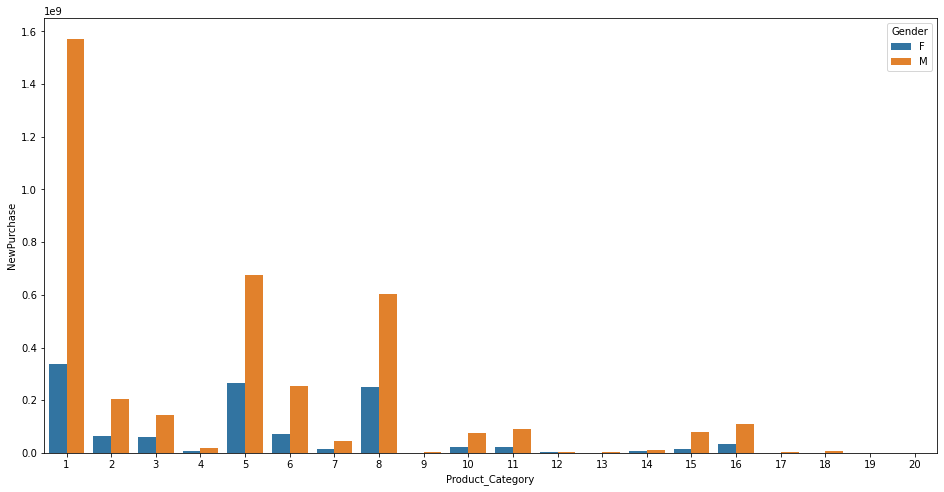

In [61]:
#Total purchases by each Product per gender
plt.figure(figsize=(16,8))
df1=df.groupby(["Product_Category","Gender"])["NewPurchase"].sum().reset_index()
a=sns.barplot(y=df1["NewPurchase"],x=df1["Product_Category"],hue=df1["Gender"])

plt.show()

In [62]:
#creating new dataframes for each gender

In [63]:
female=df[df["Gender"]=="F"].reset_index(drop=True)


female=female.groupby("User_ID")["NewPurchase"].sum().reset_index()

In [64]:
male=df[df["Gender"]=="M"].reset_index(drop=True)


male=male.groupby("User_ID")["NewPurchase"].sum().reset_index()

In [65]:
female

,User_ID,NewPurchase
0,1000001,334093.0
1,1000006,379930.0
2,1000010,2169510.0
3,1000011,557023.0
4,1000016,150490.0
...,...,...
1661,1006035,956645.0
1662,1006036,4112080.0
1663,1006037,1117224.5
1664,1006038,90034.0


In [66]:
male

,User_ID,NewPurchase
0,1000002,810472.0
1,1000003,341635.0
2,1000004,206468.0
3,1000005,821001.0
4,1000007,234668.0
...,...,...
4220,1006030,735476.5
4221,1006032,514805.5
4222,1006033,501843.0
4223,1006034,190869.5


## Determining how sample size impacts the deviation in data 

In [106]:
len(female),len(male)

(1666, 4225)

For males

[]

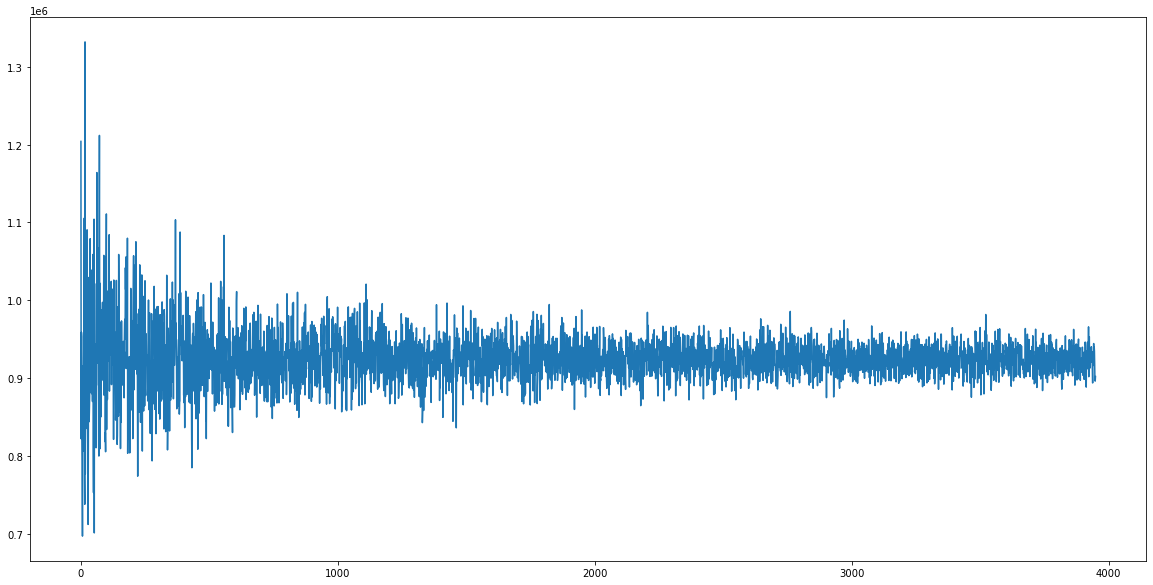

In [68]:
#checking how deviations will vary with different sample size
malesamplemeans=[]
for i in range(50,4000):
    male_sample=np.random.choice(male["NewPurchase"],size=i,replace=True)
    malesamplemeans.append(np.mean(male_sample))



plt.figure(figsize = (20, 10))
plt.plot(malesamplemeans)
plt.xticks(np.arange(0, 100000, 1000))
plt.plot()
    

It can be inferred from the above plot that as the sample size is small the deviations are fairly high.As the sample size increases, the deviation becomes smaller and smaller.The deviations will be small if the sample size taken is greater than 2000.

For Females-

[]

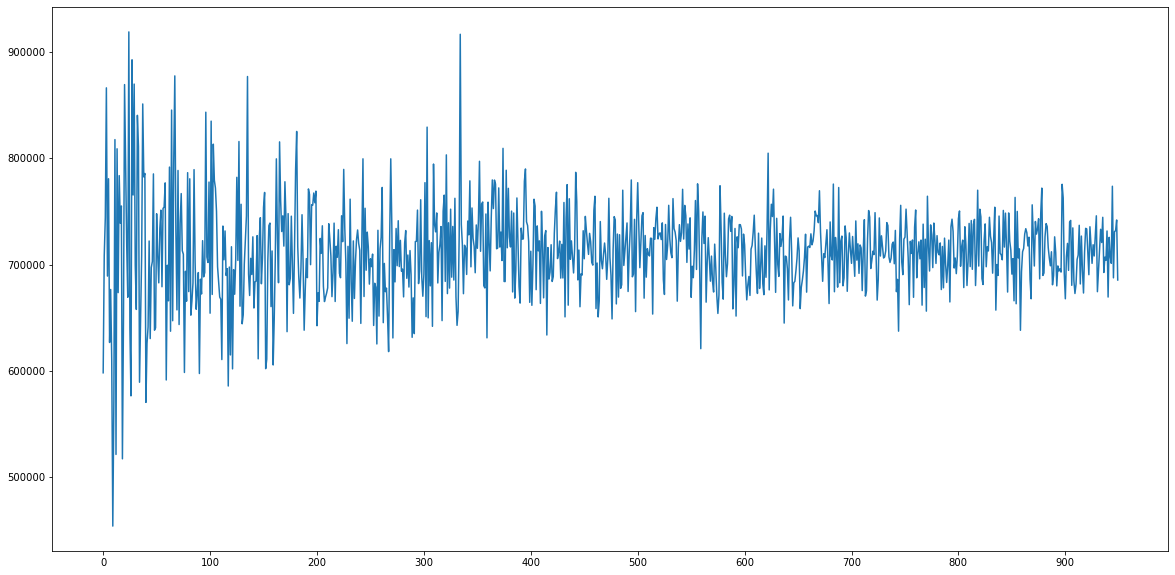

In [69]:
#checking how deviations will vary with different sample size
femalesamplemeans=[]
for i in range(50,1000):
    female_sample=np.random.choice(female["NewPurchase"],size=i,replace=True)
    femalesamplemeans.append(np.mean(female_sample))



plt.figure(figsize = (20, 10))
plt.plot(femalesamplemeans)
plt.xticks(np.arange(0, 10000, 100))
plt.plot()
    

# Determining Mean Purchase made by females and males  with sample size of 300 and 1000 taken 10000 times


In [70]:
#for females taking sample size of 300 and repeating for 10000 time
femalemeans = []
nbootstrap=10000
for sample_size in range(nbootstrap):
    sample_mean = female['NewPurchase'].sample(300).mean()
    femalemeans.append(sample_mean)

In [71]:
#for males taking sample size of 1000 and repeating for 10000 time
malemeans = []
nbootstrap=10000
for sample_size in range(nbootstrap):
    sample_mean = male['NewPurchase'].sample(1000).mean()
    malemeans.append(sample_mean)

Confidence_Interval is 90%

In [72]:
confidence_level=0.90
female_ci = np.percentile(femalemeans, [100 * (1 - confidence_level) / 2, 100 * (1 + confidence_level) / 2])
female_ci
print("With 90% confidence interval: \nwhen sample size is 300 for female :")
print("Average purchases will lie in range :",female_ci)

confidence_level=0.90
male_ci = np.percentile(malemeans, [100 * (1 - confidence_level) / 2, 100 * (1 + confidence_level) / 2])
male_ci
print("With 90% confidence interval: \nwhen sample size is 1000 for male :")
print("Average purchases will lie in range :",male_ci)


With 90% confidence interval: 
when sample size is 300 for female :
Average purchases will lie in range : [644625.07308333 782160.18041667]
With 90% confidence interval: 
when sample size is 1000 for male :
Average purchases will lie in range : [880158.597525 970519.75505 ]


Confidence interavl is 95%

In [73]:
confidence_level=0.95
female_ci = np.percentile(femalemeans, [100 * (1 - confidence_level) / 2, 100 * (1 + confidence_level) / 2])
female_ci
print("With 95% confidence interval: \nwhen sample size is 300 for female :")
print("Average purchases will lie in range :",female_ci)



confidence_level=0.95
male_ci = np.percentile(malemeans, [100 * (1 - confidence_level) / 2, 100 * (1 + confidence_level) / 2])
male_ci
print("With 95% confidence interval: \nwhen sample size is 1000 for male :")
print("Average purchases will lie in range :",male_ci)


With 95% confidence interval: 
when sample size is 300 for female :
Average purchases will lie in range : [631287.946375   796763.20954167]
With 95% confidence interval: 
when sample size is 1000 for male :
Average purchases will lie in range : [871684.56145 978597.3444 ]


Confidence interval is 99%

In [74]:
confidence_level=0.99
female_ci = np.percentile(femalemeans, [100 * (1 - confidence_level) / 2, 100 * (1 + confidence_level) / 2])
female_ci
print("With 95% confidence interval: \nwhen sample size is 300 for female :")
print("Average purchases will lie in range :",female_ci)



confidence_level=0.99
male_ci = np.percentile(malemeans, [100 * (1 - confidence_level) / 2, 100 * (1 + confidence_level) / 2])
male_ci
print("With 99% confidence interval: \nwhen sample size is 1000 for male :")
print("Average purchases will lie in range :",male_ci)


With 95% confidence interval: 
when sample size is 300 for female :
Average purchases will lie in range : [605835.861      822914.04839167]
With 99% confidence interval: 
when sample size is 1000 for male :
Average purchases will lie in range : [856588.02748 996607.03588]


Plotting female average purchase when sample size is 300

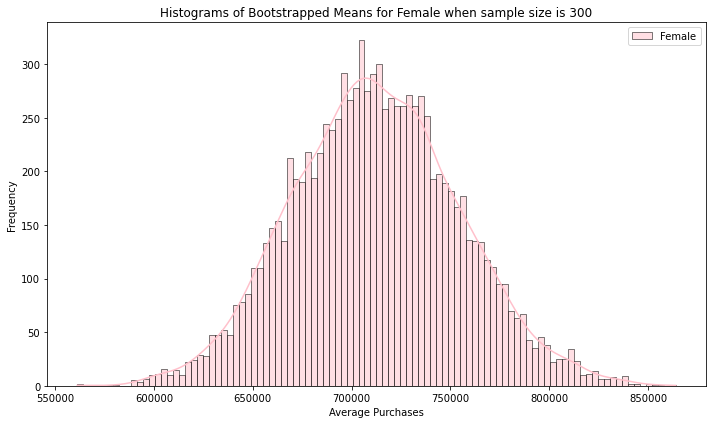

In [75]:
plt.figure(figsize=(10, 6))

# Plot histogram for female bootstrap means
sns.histplot(femalemeans, label='Female',kde=True,bins=100,color="pink")
plt.xlabel('Average Purchases')
plt.ylabel('Frequency')
plt.title('Histograms of Bootstrapped Means for Female when sample size is 300')
plt.legend()
plt.tight_layout()



plt.show()


Plotting male average purchase when sample size is 1000

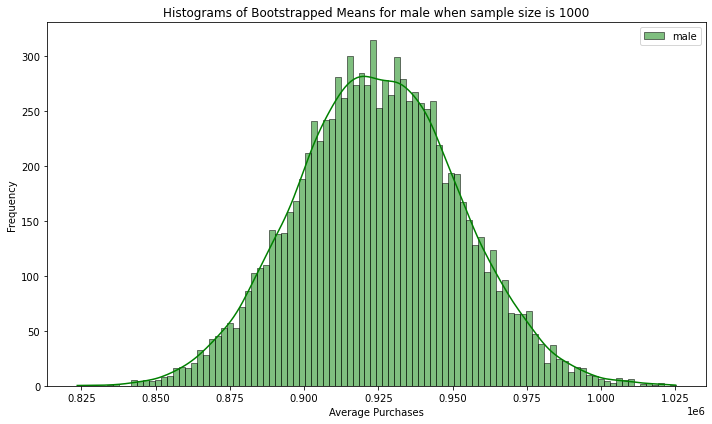

In [76]:
plt.figure(figsize=(10, 6))

# Plot histogram for female bootstrap means
sns.histplot(malemeans, label='male',kde=True,bins=100,color="green")
plt.xlabel('Average Purchases')
plt.ylabel('Frequency')
plt.title('Histograms of Bootstrapped Means for male when sample size is 1000')
plt.legend()
plt.tight_layout()


# Show the plot
plt.show()


# Determining the average purchases by Increasing the sample size for females to 1500 and males to 3000 with 90%/95% and 99% confidence interval

In [77]:
malemeans = []
femalemeans = []
nbootstrap=10000
for sample_size in range(nbootstrap):
   
    sample_mean_male = male['NewPurchase'].sample(3000).mean()
    sample_mean_female = female['NewPurchase'].sample(1500).mean()
    
    femalemeans.append(sample_mean_female)
    malemeans.append(sample_mean_male)


Confidence interval is 90%

In [78]:
confidence_level=0.90
male_ci = np.percentile(malemeans, [100 * (1 - confidence_level) / 2, 100 * (1 + confidence_level) / 2])
female_ci = np.percentile(femalemeans, [100 * (1 - confidence_level) / 2, 100 * (1 + confidence_level) / 2])

print("With 90% confidence interval: \nwhen sample size is 3000 for male :")
print("Average purchases will lie in range :",male_ci)
print("With 90% confidence interval: \nwhen sample size is 1500 for female :")
print("Average purchases will lie in range :",female_ci)


With 90% confidence interval: 
when sample size is 3000 for male :
Average purchases will lie in range : [908502.589725   940279.62633333]
With 90% confidence interval: 
when sample size is 1500 for female :
Average purchases will lie in range : [700230.08406667 721635.22101667]


confidence_level is 95%


In [79]:
confidence_level=0.95
male_ci = np.percentile(malemeans, [100 * (1 - confidence_level) / 2, 100 * (1 + confidence_level) / 2])
female_ci = np.percentile(femalemeans, [100 * (1 - confidence_level) / 2, 100 * (1 + confidence_level) / 2])

print("With 95% confidence interval: \nwhen sample size is 3000 for male :")
print("Average purchases will lie in range :",male_ci)
print("With 95% confidence interval: \nwhen sample size is 1500 for female :")
print("Average purchases will lie in range :",female_ci)


With 95% confidence interval: 
when sample size is 3000 for male :
Average purchases will lie in range : [905686.0237875  943394.26892917]
With 95% confidence interval: 
when sample size is 1500 for female :
Average purchases will lie in range : [698192.46728333 723424.52106667]


Confidence interval is 99%

In [80]:
confidence_level=0.99
male_ci = np.percentile(malemeans, [100 * (1 - confidence_level) / 2, 100 * (1 + confidence_level) / 2])
female_ci = np.percentile(femalemeans, [100 * (1 - confidence_level) / 2, 100 * (1 + confidence_level) / 2])

print("With 99% confidence interval: \nwhen sample size is 3000 for male :")
print("Average purchases will lie in range :",male_ci)
print("With 99% confidence interval: \nwhen sample size is 1500 for female :")
print("Average purchases will lie in range :",female_ci)


With 99% confidence interval: 
when sample size is 3000 for male :
Average purchases will lie in range : [899288.87259583 949694.46505917]
With 99% confidence interval: 
when sample size is 1500 for female :
Average purchases will lie in range : [693625.53590167 726973.9921    ]


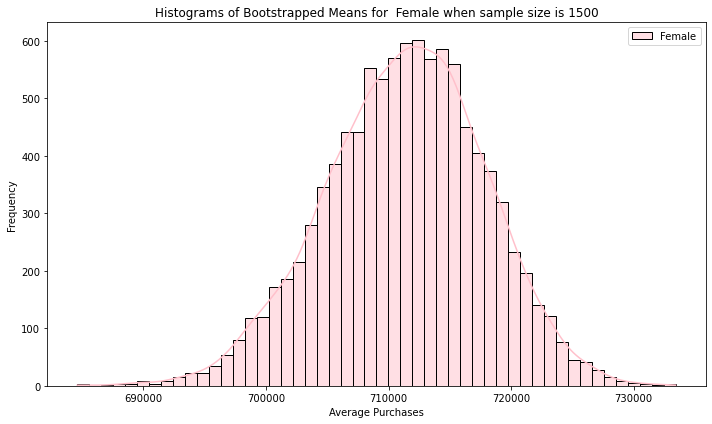

In [81]:
plt.figure(figsize=(10, 6))

# Plot histogram for female bootstrap means
sns.histplot(femalemeans, label='Female',color="pink",bins=50,kde=True)

plt.xlabel('Average Purchases')
plt.ylabel('Frequency')
plt.title('Histograms of Bootstrapped Means for  Female when sample size is 1500')
plt.legend()
plt.tight_layout()


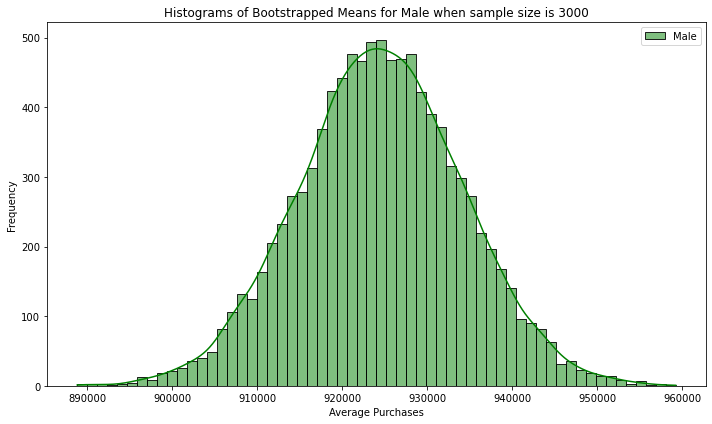

In [107]:
plt.figure(figsize=(10, 6))
# Plot histogram for male bootstrap means
sns.histplot(malemeans, label='Male',kde=True,color="green")

plt.xlabel('Average Purchases')
plt.ylabel('Frequency')
plt.title('Histograms of Bootstrapped Means for Male when sample size is 3000')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [108]:
print("The width of the bell curve for male plot is ",male_ci[1]-male_ci[0])

The width of the bell curve for male plot is  50405.59246333304


In [109]:
print("The width of the bell curve for female plot is ",female_ci[1]-female_ci[0])

The width of the bell curve for female plot is  33348.4561983333


In [85]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,NewPurchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,7969.0


## Determining the mean purchase made by each user belonging to different Marital Status per transaction

In [86]:
married=df[df["Marital_Status"]==1].reset_index(drop=True)
married=married.groupby("User_ID")["NewPurchase"].sum().reset_index()
married

,User_ID,NewPurchase
0,1000004,206468.0
1,1000005,821001.0
2,1000007,234668.0
3,1000008,796593.0
4,1000010,2169510.0
...,...,...
2469,1006029,157436.0
2470,1006030,735476.5
2471,1006033,501843.0
2472,1006036,4112080.0


-------------------------------------------------------------------------------------------------------------------------

In [87]:
single=df[df["Marital_Status"]==0].reset_index(drop=True)
single=single.groupby("User_ID")["NewPurchase"].sum().reset_index()
single

,User_ID,NewPurchase
0,1000001,334093.0
1,1000002,810472.0
2,1000003,341635.0
3,1000006,379930.0
4,1000009,594099.0
...,...,...
3412,1006034,190869.5
3413,1006035,956645.0
3414,1006037,1117224.5
3415,1006038,90034.0


# For single:Determining how different sample size will impact the deviation:

In [88]:
mean_purchases = []
for sample_size in range(50, 3000):
    sample_mean = single['NewPurchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

[]

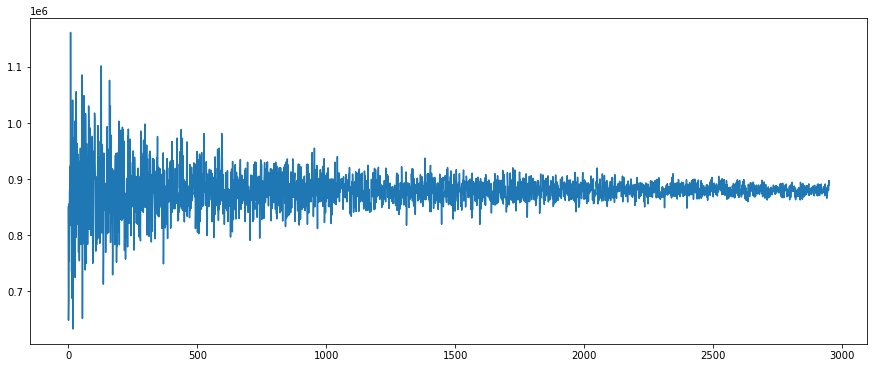

In [89]:
plt.figure(figsize = (15, 6))
plt.plot(mean_purchases)
plt.plot()

# For married:Determining how different sample size will impact the deviation:

[]

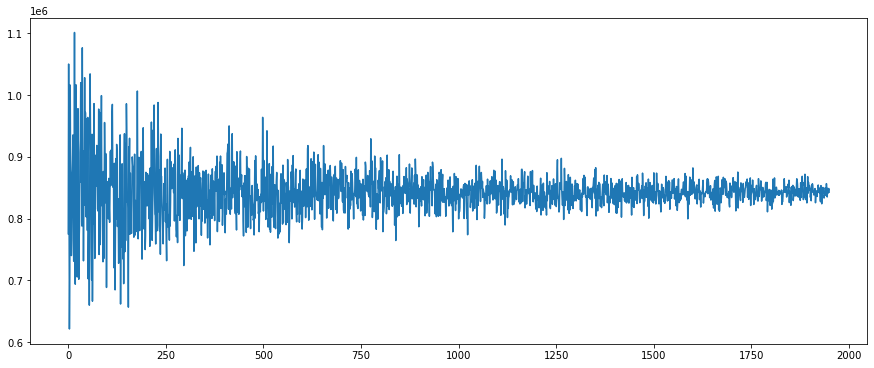

In [90]:
mean_purchases = []
for sample_size in range(50, 2000):
    sample_mean = married['NewPurchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)
plt.figure(figsize = (15, 6))
plt.plot(mean_purchases)
plt.plot()

##### For conservative analysis, married sample size of 2000 is taken 10000 times and  single sample size of 1500 is taken 10000 time

In [91]:
singlemeans = []
marriedmeans = []
nbootstrap=10000
for sample_size in range(nbootstrap):
   
    sample_mean_single = single['NewPurchase'].sample(1500).mean()
    sample_mean_married= married['NewPurchase'].sample(2000).mean()
    
    singlemeans.append(sample_mean_single)
    marriedmeans.append(sample_mean_married)
confidence_level=0.95
single_ci = np.percentile(singlemeans, [100 * (1 - confidence_level) / 2, 100 * (1 + confidence_level) / 2])
married_ci = np.percentile(marriedmeans, [100 * (1 - confidence_level) / 2, 100 * (1 + confidence_level) / 2])

print("With 95% confidence interval: \nwhen sample size is 1500 for single :")
print("Average purchases will lie in range :",single_ci)
print("With 95% confidence interval: \nwhen sample size is 2000 for married :")
print("Average purchases will lie in range :",married_ci)


With 95% confidence interval: 
when sample size is 1500 for single :
Average purchases will lie in range : [843581.287775 916092.431025]
With 95% confidence interval: 
when sample size is 2000 for married :
Average purchases will lie in range : [824524.4845875 860548.1926125]


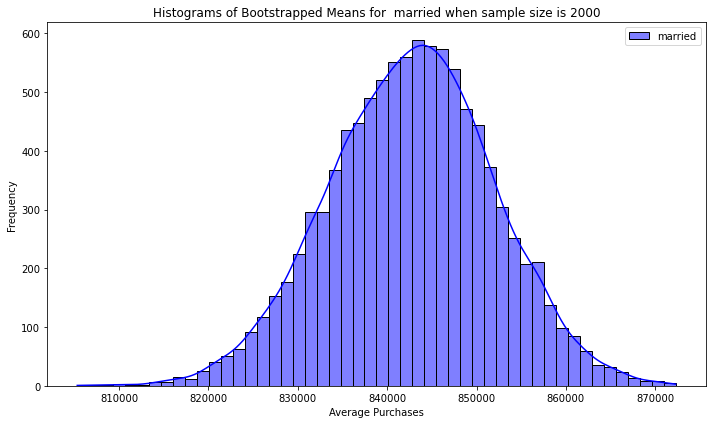

In [92]:
plt.figure(figsize=(10, 6))

# Plot histogram for female bootstrap means
sns.histplot(marriedmeans, label='married',color="blue",bins=50,kde=True)

plt.xlabel('Average Purchases')
plt.ylabel('Frequency')
plt.title('Histograms of Bootstrapped Means for  married when sample size is 2000')
plt.legend()
plt.tight_layout()


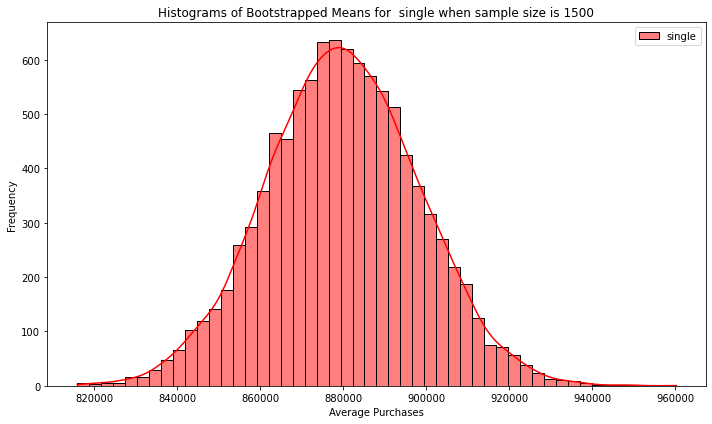

In [110]:
plt.figure(figsize=(10, 6))

# Plot histogram for female bootstrap means
sns.histplot(singlemeans, label='single',color="red",bins=50,kde=True)

plt.xlabel('Average Purchases')
plt.ylabel('Frequency')
plt.title('Histograms of Bootstrapped Means for  single when sample size is 1500')
plt.legend()
plt.tight_layout()


# Determining the mean purchase made by each user per transaction based on their age groups :

In [116]:
df_age_0_to_17

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,NewPurchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,1057.0
85,1000019,P00112542,M,0-17,10,A,3,0,1,7746,7746.0
...,...,...,...,...,...,...,...,...,...,...,...
549904,1005803,P00375436,M,0-17,10,C,1,0,20,256,256.0
550012,1005953,P00370853,M,0-17,10,B,0,0,19,26,26.0
550024,1005973,P00370293,M,0-17,10,C,4+,0,19,12,12.0
550035,1005989,P00370853,F,0-17,10,C,3,0,19,61,61.0


In [115]:
df_age_0_to_17 = df.loc[df['Age'] == '0-17']
df_age_18_to_25 = df.loc[df['Age'] == '18-25']
df_age_26_to_35 = df.loc[df['Age'] == '26-35']
df_age_36_to_45 = df.loc[df['Age'] == '36-45']
df_age_46_to_50 = df.loc[df['Age'] == '46-50']
df_age_51_to_55 = df.loc[df['Age'] == '51-55']
df_age_above_55 = df.loc[df['Age'] == '55+']

In [117]:
df_age_0_to_17 = df_age_0_to_17.groupby(by = 'User_ID')['NewPurchase'].sum().to_frame().reset_index().rename(columns = {'NewPurchase' : 'Total_Purchase'})
df_age_18_to_25 = df_age_18_to_25.groupby(by = 'User_ID')['NewPurchase'].sum().to_frame().reset_index().rename(columns = {'NewPurchase' : 'Total_Purchase'})
df_age_26_to_35 = df_age_26_to_35.groupby(by = 'User_ID')['NewPurchase'].sum().to_frame().reset_index().rename(columns = {'NewPurchase' : 'Total_Purchase'})
df_age_36_to_45 = df_age_36_to_45.groupby(by = 'User_ID')['NewPurchase'].sum().to_frame().reset_index().rename(columns = {'NewPurchase' : 'Total_Purchase'})
df_age_46_to_50 = df_age_46_to_50.groupby(by = 'User_ID')['NewPurchase'].sum().to_frame().reset_index().rename(columns = {'NewPurchase' : 'Total_Purchase'})
df_age_51_to_55 = df_age_51_to_55.groupby(by = 'User_ID')['NewPurchase'].sum().to_frame().reset_index().rename(columns = {'NewPurchase' : 'Total_Purchase'})
df_age_above_55 = df_age_above_55.groupby(by = 'User_ID')['NewPurchase'].sum().to_frame().reset_index().rename(columns = {'NewPurchase' : 'Total_Purchase'})

# for age 0-17

In [118]:
df_age_0_to_17

,User_ID,Total_Purchase
0,1000001,334093.0
1,1000019,1458069.0
2,1000051,200772.0
3,1000075,1035584.0
4,1000086,292182.5
...,...,...
213,1005844,476231.0
214,1005953,629161.0
215,1005973,270475.0
216,1005989,466195.0


[]

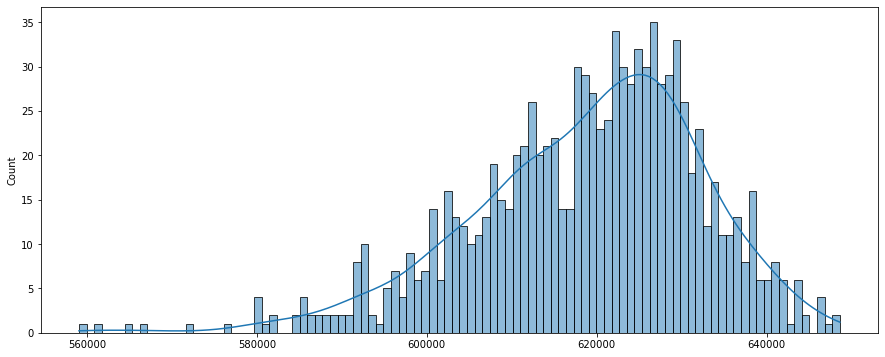

In [126]:
##### For conservative analysis, sample size of 200 is taken 1000 times

means = []
for sample_size in range(1000):
    sample_mean = df_age_0_to_17['Total_Purchase'].sample(200).mean()
    means.append(sample_mean)

plt.figure(figsize = (15, 6))
sns.histplot(means, kde = True, bins = 100)
plt.plot()


In [122]:
##### Determining Mean Total Purchase made by Age Group 0 - 17 with 95% Confidence

In [124]:
confidence_level=0.95
ci = np.percentile(means, [100 * (1 - confidence_level) / 2, 100 * (1 + confidence_level) / 2])
print("With 95% confidence interval:")
print("Average purchases for age 0-17  will lie in range :",ci)

With 95% confidence interval:
Average purchases for age 0-17  will lie in range : [584752.384625 640300.232   ]


# FOR Age 18-25

In [125]:
df_age_18_to_25

,User_ID,Total_Purchase
0,1000018,1979047.0
1,1000021,127099.0
2,1000022,1279914.0
3,1000025,534706.0
4,1000034,807983.0
...,...,...
1064,1005998,702901.0
1065,1006008,266306.0
1066,1006027,265201.0
1067,1006028,362972.0


[]

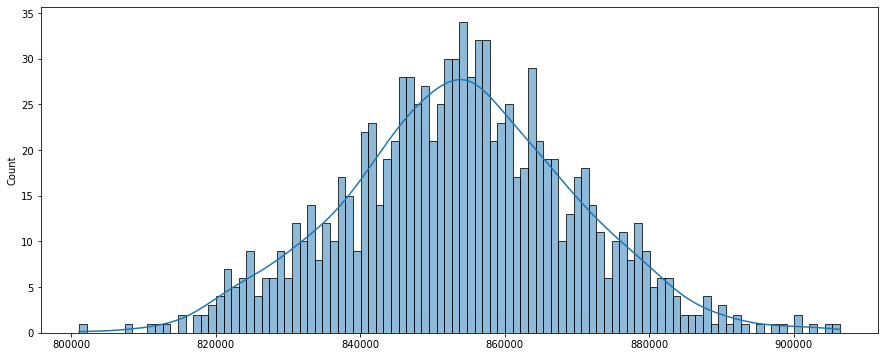

In [130]:
##### For conservative analysis, sample size of 800 is taken 1000 times
means = []
for sample_size in range(1000):
    sample_mean = df_age_18_to_25['Total_Purchase'].sample(800).mean()
    means.append(sample_mean)

plt.figure(figsize = (15, 6))
sns.histplot(means, kde = True, bins = 100)
plt.plot()


In [131]:
confidence_level=0.95
ci = np.percentile(means, [100 * (1 - confidence_level) / 2, 100 * (1 + confidence_level) / 2])
print("With 95% confidence interval:")
print("Average purchases for age 18-25  will lie in range :",ci)

With 95% confidence interval:
Average purchases for age 18-25  will lie in range : [822324.85315625 884654.96448437]


# for Age 26-35

In [132]:
df_age_26_to_35

,User_ID,Total_Purchase
0,1000003,341635.0
1,1000005,821001.0
2,1000008,796593.0
3,1000009,594099.0
4,1000011,557023.0
...,...,...
2048,1006030,735476.5
2049,1006034,190869.5
2050,1006035,956645.0
2051,1006036,4112080.0


[]

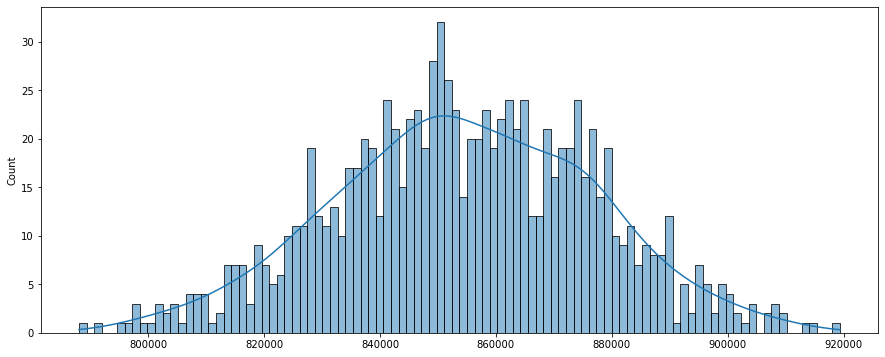

In [137]:
##### For conservative analysis, sample size of 1500 is taken 1000 times
means = []
for sample_size in range(1000):
    sample_mean = df_age_18_to_25['Total_Purchase'].sample(1500,replace=True).mean()
    means.append(sample_mean)

plt.figure(figsize = (15, 6))
sns.histplot(means, kde = True, bins = 100)
plt.plot()


In [139]:
confidence_level=0.95
ci = np.percentile(means, [100 * (1 - confidence_level) / 2, 100 * (1 + confidence_level) / 2])
print("With 95% confidence interval:")
print("Average purchases for age 26-35  will lie in range :",ci)

With 95% confidence interval:
Average purchases for age 26-35  will lie in range : [809025.4256     897654.87211667]


# For Age 36-45

In [141]:
df_age_36_to_45

,User_ID,Total_Purchase
0,1000007,234668.0
1,1000010,2169510.0
2,1000014,127629.0
3,1000016,150490.0
4,1000023,1670930.5
...,...,...
1162,1006011,1198714.0
1163,1006012,127920.0
1164,1006017,160230.0
1165,1006018,971948.0


[]

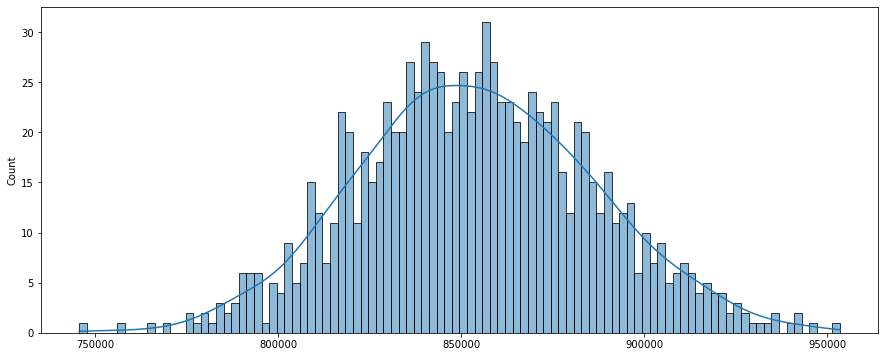

In [142]:
##### For conservative analysis, sample size of 800 is taken 1000 times
means = []
for sample_size in range(1000):
    sample_mean = df_age_18_to_25['Total_Purchase'].sample(800,replace=True).mean()
    means.append(sample_mean)

plt.figure(figsize = (15, 6))
sns.histplot(means, kde = True, bins = 100)
plt.plot()


In [144]:
confidence_level=0.95
ci = np.percentile(means, [100 * (1 - confidence_level) / 2, 100 * (1 + confidence_level) / 2])
print("With 95% confidence interval:")
print("Average purchases for age 36 to 45   will lie in range :",ci)

With 95% confidence interval:
Average purchases for age 36 to 45   will lie in range : [792331.65570313 917927.5301875 ]


# for age 46 to 55:

In [149]:
df_age_46_to_50

,User_ID,Total_Purchase
0,1000004,206468.0
1,1000013,713927.0
2,1000033,1940418.0
3,1000035,821303.0
4,1000044,1180380.0
...,...,...
526,1006014,526367.5
527,1006016,3768522.0
528,1006032,514805.5
529,1006037,1117224.5


[]

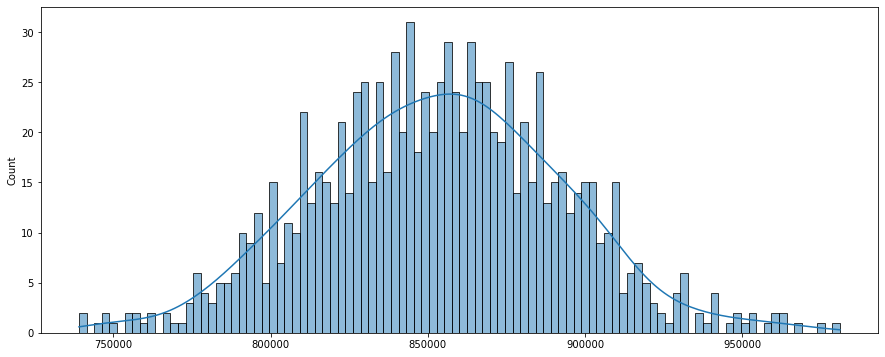

In [150]:
##### For conservative analysis, sample size of 500 is taken 1000 times
means = []
for sample_size in range(1000):
    sample_mean = df_age_18_to_25['Total_Purchase'].sample(500,replace=True).mean()
    means.append(sample_mean)

plt.figure(figsize = (15, 6))
sns.histplot(means, kde = True, bins = 100)
plt.plot()

In [152]:
confidence_level=0.95
ci = np.percentile(means, [100 * (1 - confidence_level) / 2, 100 * (1 + confidence_level) / 2])
print("With 95% confidence interval:")
print("Average purchases for age 46 to 50   will lie in range :",ci)

With 95% confidence interval:
Average purchases for age 46 to 50   will lie in range : [777697.88975 930608.31535]


# For age 51 to 55

In [156]:
df_age_51_to_55

,User_ID,Total_Purchase
0,1000006,379930.0
1,1000017,1420495.0
2,1000054,187451.0
3,1000059,977910.5
4,1000060,280029.0
...,...,...
476,1005967,136189.0
477,1005993,127556.5
478,1006002,1836322.5
479,1006020,368488.5


[]

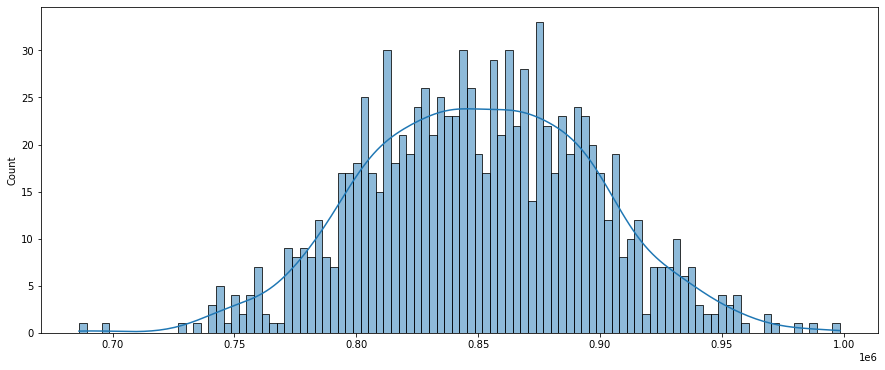

In [157]:
##### For conservative analysis, sample size of 350 is taken 1000 times
means = []
for sample_size in range(1000):
    sample_mean = df_age_18_to_25['Total_Purchase'].sample(350,replace=True).mean()
    means.append(sample_mean)

plt.figure(figsize = (15, 6))
sns.histplot(means, kde = True, bins = 100)
plt.plot()

In [159]:
confidence_level=0.95
ci = np.percentile(means, [100 * (1 - confidence_level) / 2, 100 * (1 + confidence_level) / 2])
print("With 95% confidence interval:")
print("Average purchases for age 51 to 55   will lie in range :",ci)

With 95% confidence interval:
Average purchases for age 51 to 55   will lie in range : [758926.38375    938586.17982143]


# for age 55+

In [160]:
df_age_above_55

,User_ID,Total_Purchase
0,1000002,810472.0
1,1000031,496154.0
2,1000080,339364.0
3,1000089,112276.0
4,1000090,1308565.5
...,...,...
367,1005948,2111964.0
368,1005968,282354.0
369,1005980,1070641.0
370,1005986,606283.0


[]

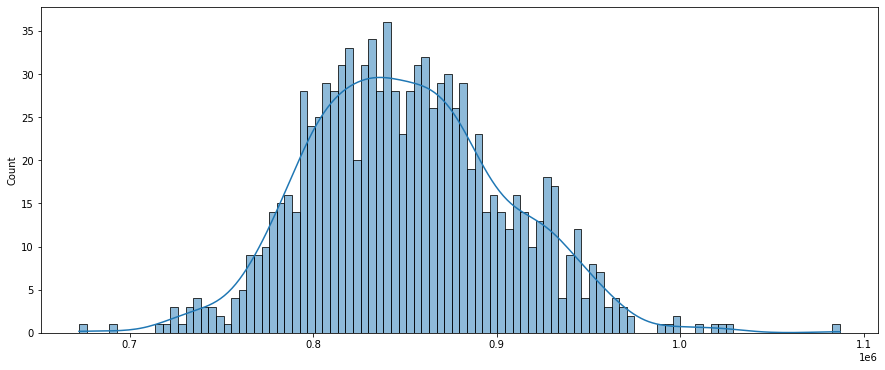

In [161]:
##### For conservative analysis, sample size of 250 is taken 1000 times
means = []
for sample_size in range(1000):
    sample_mean = df_age_18_to_25['Total_Purchase'].sample(250,replace=True).mean()
    means.append(sample_mean)

plt.figure(figsize = (15, 6))
sns.histplot(means, kde = True, bins = 100)
plt.plot()

In [162]:
confidence_level=0.95
ci = np.percentile(means, [100 * (1 - confidence_level) / 2, 100 * (1 + confidence_level) / 2])
print("With 95% confidence interval:")
print("Average purchases for age 55 above   will lie in range :",ci)

With 95% confidence interval:
Average purchases for age 55 above   will lie in range : [755604.0879 955840.9671]
